### Домашнее задание к лекции «Корреляция и корреляционный анализ»

В датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные. 

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

In [1]:
import pandas as pd

water = pd.read_csv('water.csv')
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


#### Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
class Analise():
    def __init__(self, df, col1="hardness", col2="mortality"):
        self.col1 = col1
        self.col2 = col2
        self.df = df
        
    def make_rplot(self):
        return sns.regplot(x=self.df[self.col1], y=self.df[self.col2])
    
    def count_spearman(self):
        return self.df[[self.col1, self.col2]].corr(method='spearman')
    
    def count_kendall(self):
        return self.df[[self.col1, self.col2]].corr(method='kendall')
    
    def count_determ(self):
        X = self.df[[self.col1]]
        Y = self.df[self.col2]
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=40)

        model = LinearRegression()
        model.fit(X_train, Y_train)

        return model.score(X_test, Y_test)
       
    def make_mistake_scatter(self):
        df_copy = self.df.copy()
        X = df_copy[[self.col1]]
        Y = df_copy[self.col2]
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=40)
        model = LinearRegression()
        model.fit(X_train, Y_train)
        
        df_copy['Predict'] = df_copy[self.col1].apply(lambda x: model.intercept_ + model.coef_ * x)
        return plt.scatter(y = df_copy['Predict'] - df_copy[self.col2], x = df_copy['Predict'])

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

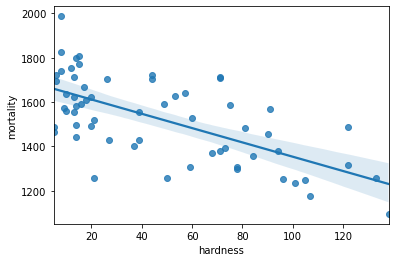

In [4]:
Analise(water).make_rplot()

In [5]:
Analise(water).count_spearman()

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [6]:
Analise(water).count_kendall()

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [7]:
Analise(water).count_determ()

0.6015469181340375

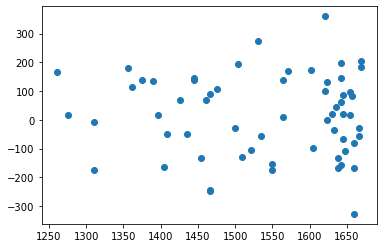

In [8]:
Analise(water).make_mistake_scatter()

Между жесткостью воды и смертностью наблюдается отрицательная взаимосвязь. С увеличением жесткости воды смертность снижается. 

#### Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [9]:
water.location.unique()

array(['South', 'North'], dtype=object)

In [10]:
south = water[water['location'] == 'South']
north = water[water['location'] == 'North']

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

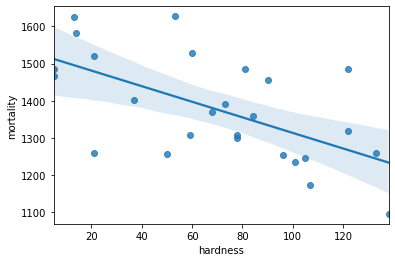

In [11]:
Analise(south).make_rplot()

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

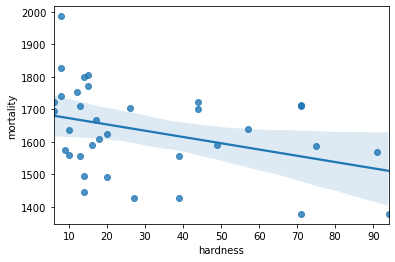

In [12]:
Analise(north).make_rplot()

In [13]:
Analise(south).count_spearman()

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [14]:
Analise(north).count_spearman()

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [15]:
Analise(south).count_kendall()

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


In [16]:
Analise(north).count_kendall()

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


In [17]:
Analise(south).count_determ()

-0.23278702012970665

In [18]:
Analise(north).count_determ()

0.039018443424383986

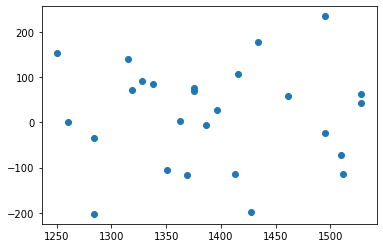

In [19]:
Analise(south).make_mistake_scatter()

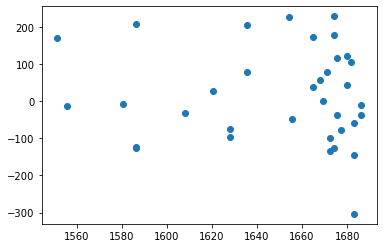

In [20]:
Analise(north).make_mistake_scatter()

Для южных городов зависимость близка к показателям всего датафрейма. При этом для северных городов корреляция очень низкая.